# Análise de Dados para Concessão de Crédito

## Explicação do Conjunto de Dados de Classificação de Crédito

Esse conjunto de dados oferece uma visão abrangente das solicitações de empréstimo, juntamente com atributos financeiros e demográficos chave que contribuem para a avaliação da aprovação ou rejeição do empréstimo. Os dados incluem tanto características específicas do solicitante quanto características específicas do empréstimo, que podem ajudar a modelar a probabilidade de aprovação do empréstimo. Abaixo está um resumo rápido::

- **Número de Registros**: 45.000
- **Total de Colunas**: 14 (Entre Categoricas e Continuas)

#### Descrição das Features:

| Coluna                               | Descrição                                                 | Tipo de Dados    |
|--------------------------------------|-------------------------------------------------------------|--------------|
| **Idade**                     | Idade do Solicitante                                             | Float        |
| **Sexo**                  | Sexo do Solicitante                                          | Categorical  |
| **Grau_Escolaridade**               | Grau de Escolaridade                      | Categorica  |
| **Salario**                  | Salário anual do Solicitante                       | Float        |
| **Tempo_Emprego**                 | Anos de experiência profissional                              | Integer      |
| **Moradia**          | Situação de Moradia           | Categorica  |
| **Valor_Emprestimo**                      | Empréstimo Requisitado                                     | Float        |
| **Proposito**                    | Propósito do Empréstimo    | Categorica  |
| **Taxa**                  | Taxa praticada para o empréstimo                        | Float        |
| **Comprometimento_Renda**            | Valor do empréstimo como uma porcentagem da renda anual                | Float        |
| **Score_Credito**                   | Score de Credito do Solicitante                                    | Integer      |
| **Inadimplencias_Anteriores**  | Indicador de Inadimplencias Anteriores (Sim/Não)                | Categorica  |
| **Credito_Concedido**                    | Resultado da Concessao de Credito (1 = aprovada, 0 = reprovada)            | Integer       |



## 1. Importação e Configuração

In [1]:
!pip install --upgrade scikit-learn xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 1.9 MB/s eta 0:01:20
   ---------------------------------------- 0.8/150.0 MB 1.5 MB/s eta 0:01:39
   ---------------------------------------- 1.3/150.0 MB 1.9 MB/s eta 0:01:19
   ---------------------------------------- 1.6/150.0 MB 1.7 MB/s eta 0:01:26
   ---------------------------------------- 1.8/150.0 MB 1.6 MB/s eta 0:01:31
    --------------------------------------- 2.4/150.0 MB 1.8 MB/s eta 0:01:23
    --------------------------------------- 3.7/150.0 MB 2.3 MB/s eta 0:01:03
   - -------------------------------------- 5.0/150.0 MB 2.8 MB/s eta 0:00:52
   - -------------------------------------- 6.3/150.0 MB 3.2 MB/s eta 0:00:46
   -- ------------------------------------- 7.6/150.0 MB 3.5 MB/s eta 0:00:41
   -- ------------------------------------- 9.2/150.0 MB 3.8 MB/s eta 0:00:37


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.utils import resample

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, roc_curve, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint, uniform

import warnings
warnings.filterwarnings("ignore")

## 2. Análise Exploratória de Dados (EDA)

- Objetivo: Entender a estrutura de dados, identificar padrões e detectar anomalias.

1. Carregamento dos dados
2. Visualização da distribuição de variáveis
3. Identificação de outliers
4. Análise de correlação entre variáveis
5. Resumo estatístico de variáveis
6. Visualização de dados categóricos e numéricos


In [3]:
data = pd.read_csv('data/dados.csv', encoding='ISO-8859-1', sep=";")
data

,Idade,Sexo,Grau_Escolaridade,Salario,Tempo_Emprego,Moradia,Valor_Emprestimo,Proposito,Taxa,Comprometimento_Renda,Score_Credito,Inadimplencias_Anteriores,Credito_Concedido
0,22.0,feminino,Mestrado,71948.0,0,ALUGUEL,35000.0,PESSOAL,16.02,0.49,561,No,1
1,21.0,feminino,Segundo Grau,12282.0,0,PRÓPRIA,1000.0,EDUCACIONAL,11.14,0.08,504,Yes,0
2,25.0,feminino,Segundo Grau,12438.0,3,HIPOTECA,5500.0,MÉDICO,12.87,0.44,635,No,1
3,23.0,feminino,Bacharel,79753.0,0,ALUGUEL,35000.0,MÉDICO,15.23,0.44,675,No,1
4,24.0,masculino,Mestrado,66135.0,1,ALUGUEL,35000.0,MÉDICO,14.27,0.53,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,masculino,Tecnólogo,47971.0,6,ALUGUEL,15000.0,MÉDICO,15.66,0.31,645,No,1
44996,37.0,feminino,Tecnólogo,65800.0,17,ALUGUEL,9000.0,REFORMA,14.07,0.14,621,No,1
44997,33.0,masculino,Tecnólogo,56942.0,7,ALUGUEL,2771.0,QUITAÇÃO,10.02,0.05,668,No,1
44998,29.0,masculino,Bacharel,33164.0,4,ALUGUEL,12000.0,EDUCACIONAL,13.23,0.36,604,No,1


### 2.1 Exploração Inicial

In [4]:
data.describe()

,Idade,Salario,Tempo_Emprego,Valor_Emprestimo,Taxa,Comprometimento_Renda,Score_Credito,Credito_Concedido
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,850.000000,1.000000


Outliers detectados em :

- Idade
- Tempo de Emprego

In [5]:
data.isnull().sum()

Idade                        0
Sexo                         0
Grau_Escolaridade            0
Salario                      0
Tempo_Emprego                0
Moradia                      0
Valor_Emprestimo             0
Proposito                    0
Taxa                         0
Comprometimento_Renda        0
Score_Credito                0
Inadimplencias_Anteriores    0
Credito_Concedido            0
dtype: int64

Não há valores nulos

In [6]:
data.duplicated().sum()

np.int64(0)

Não há valores duplicados

In [7]:
data.nunique()

Idade                           60
Sexo                             2
Grau_Escolaridade                5
Salario                      33989
Tempo_Emprego                   63
Moradia                          4
Valor_Emprestimo              4483
Proposito                        6
Taxa                          1302
Comprometimento_Renda           64
Score_Credito                  340
Inadimplencias_Anteriores        2
Credito_Concedido                2
dtype: int64

### 2.2 Análises Específicas e de Distribuições

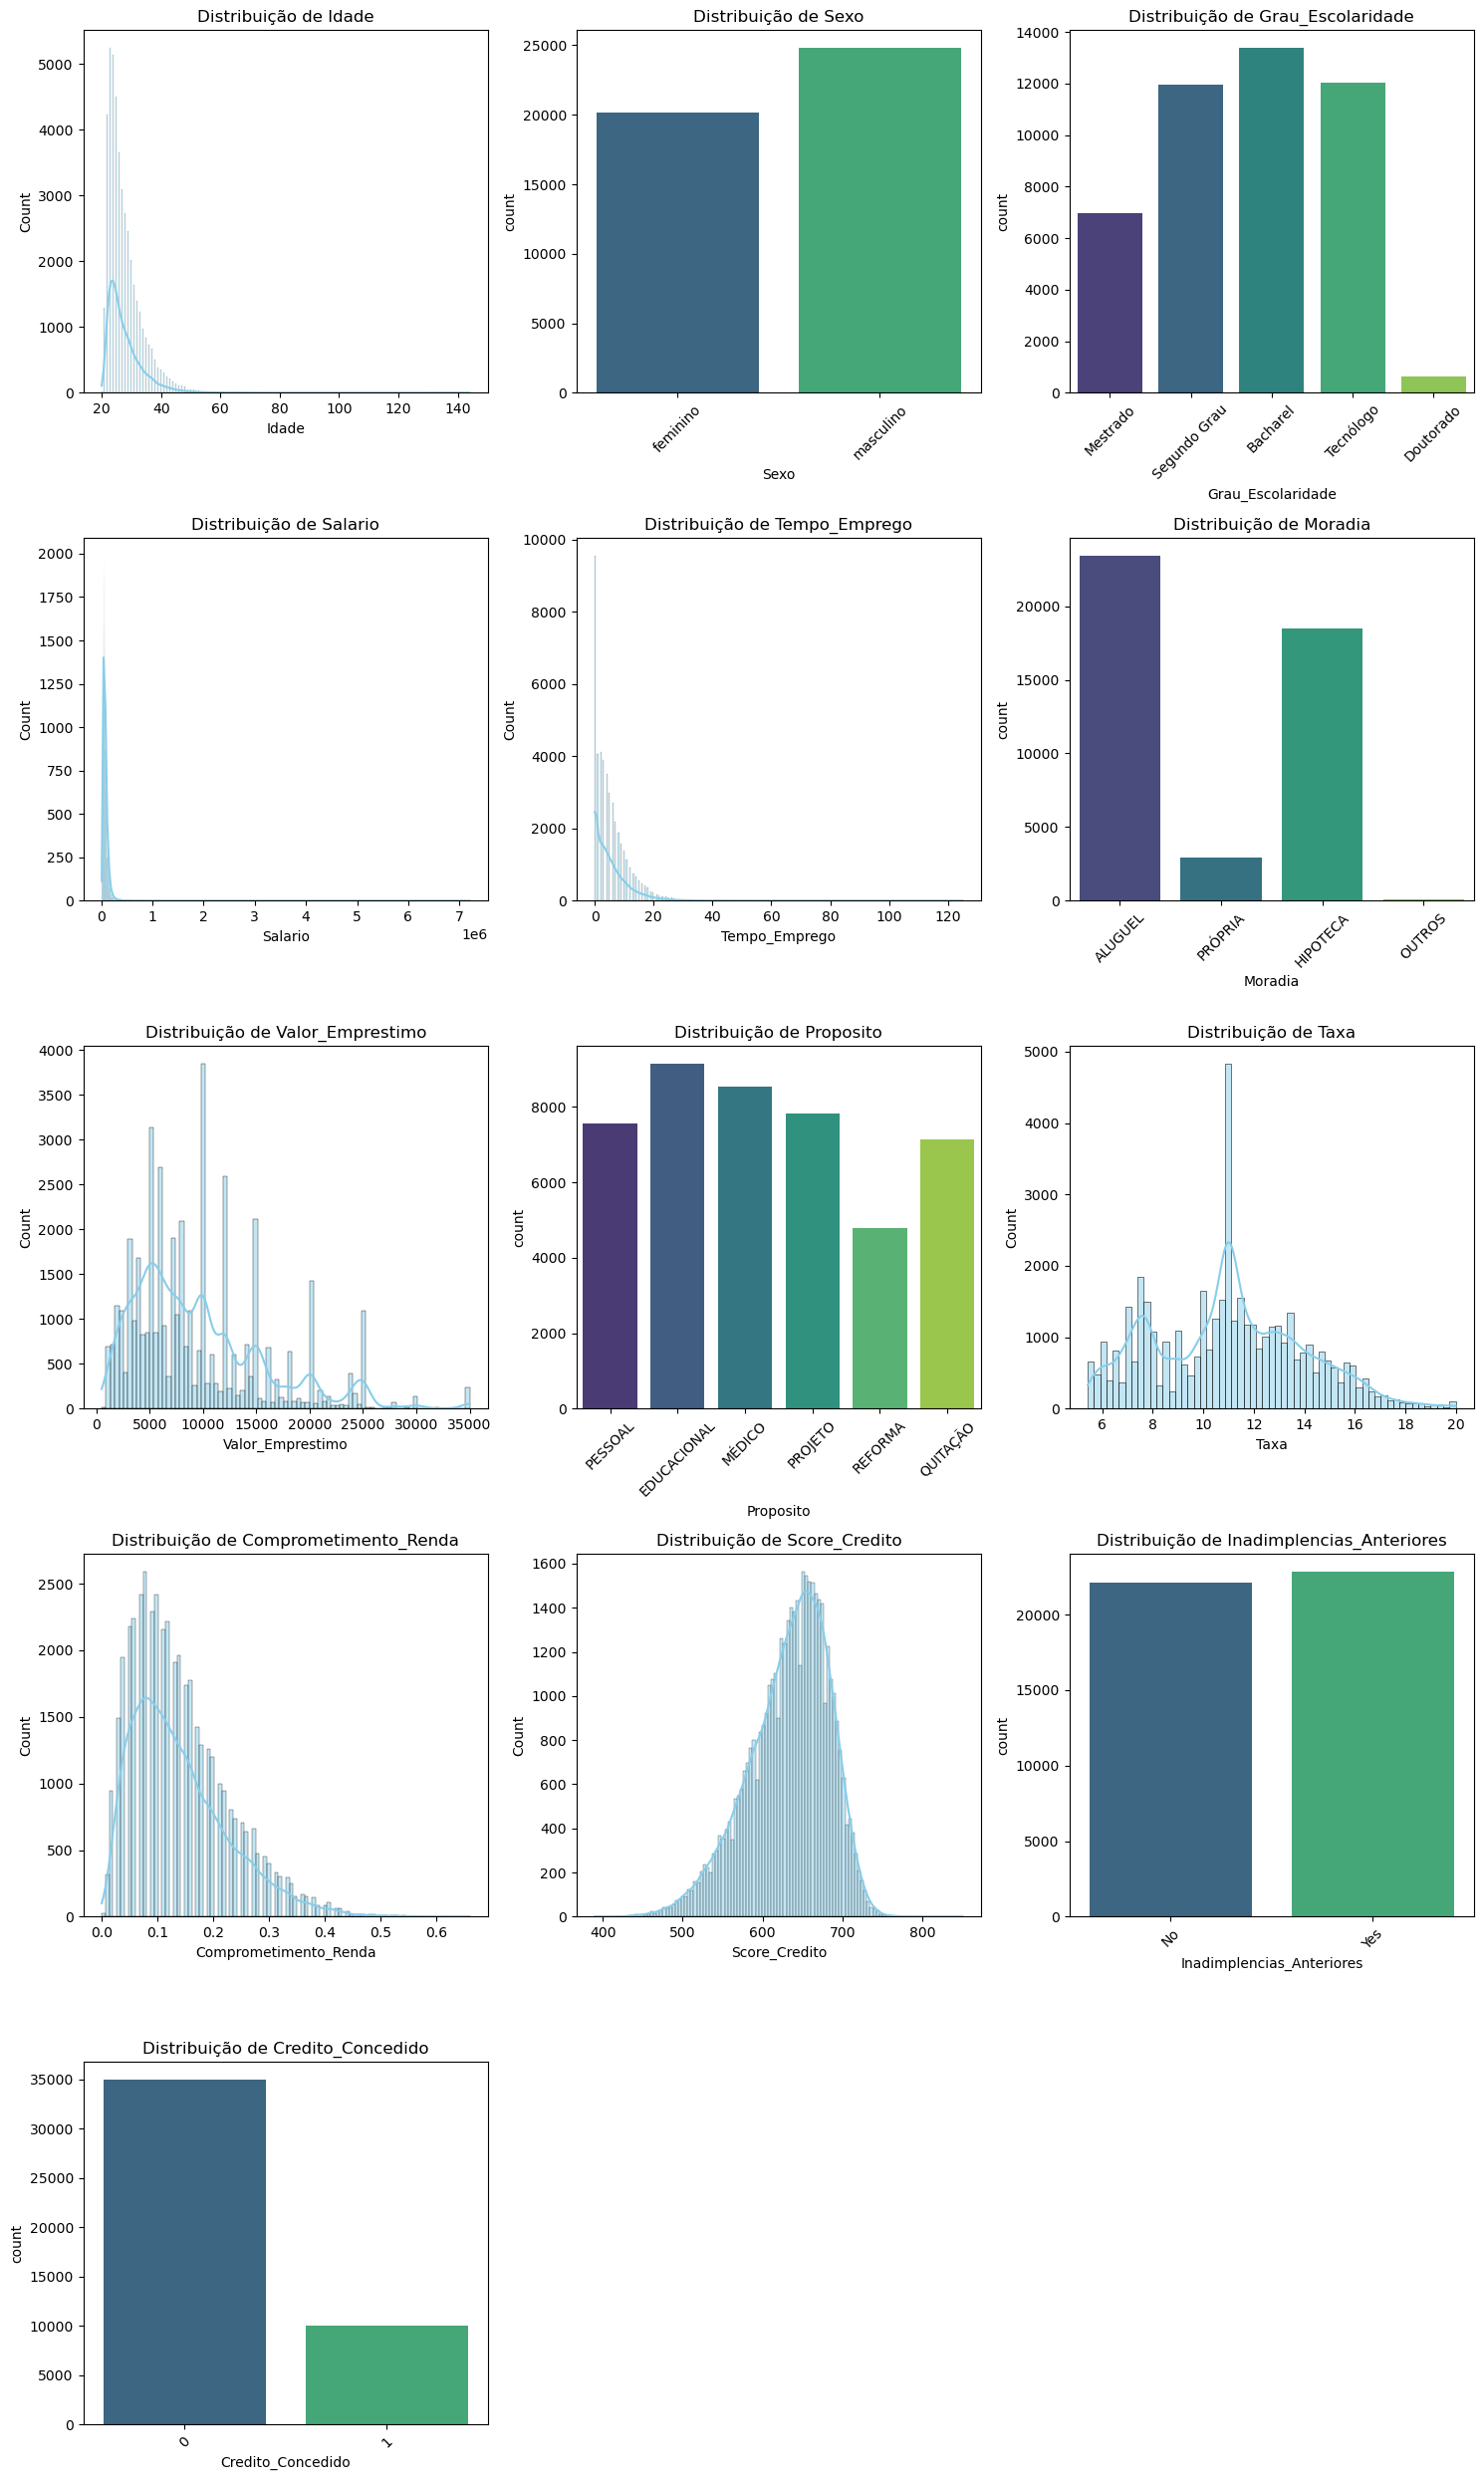

In [8]:
num_cols = len(data.columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # organiza em no máximo 3 colunas por linha

plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(data.columns, 1):
    plt.subplot(num_rows, 3, i)  # organiza os gráficos em uma grid 3xN
    if data[column].dtype == 'object' or data[column].nunique() < 10:  # se for categórica ou tem poucos valores únicos
        sns.countplot(x=data[column], palette='viridis')  # gráfico de barras
        plt.title(f'Distribuição de {column}')
        plt.xticks(rotation=45)  
    else:
        sns.histplot(data[column], kde=True, color='skyblue')  # histograma com KDE para quantitativas
        plt.title(f'Distribuição de {column}')

plt.tight_layout()
plt.show()

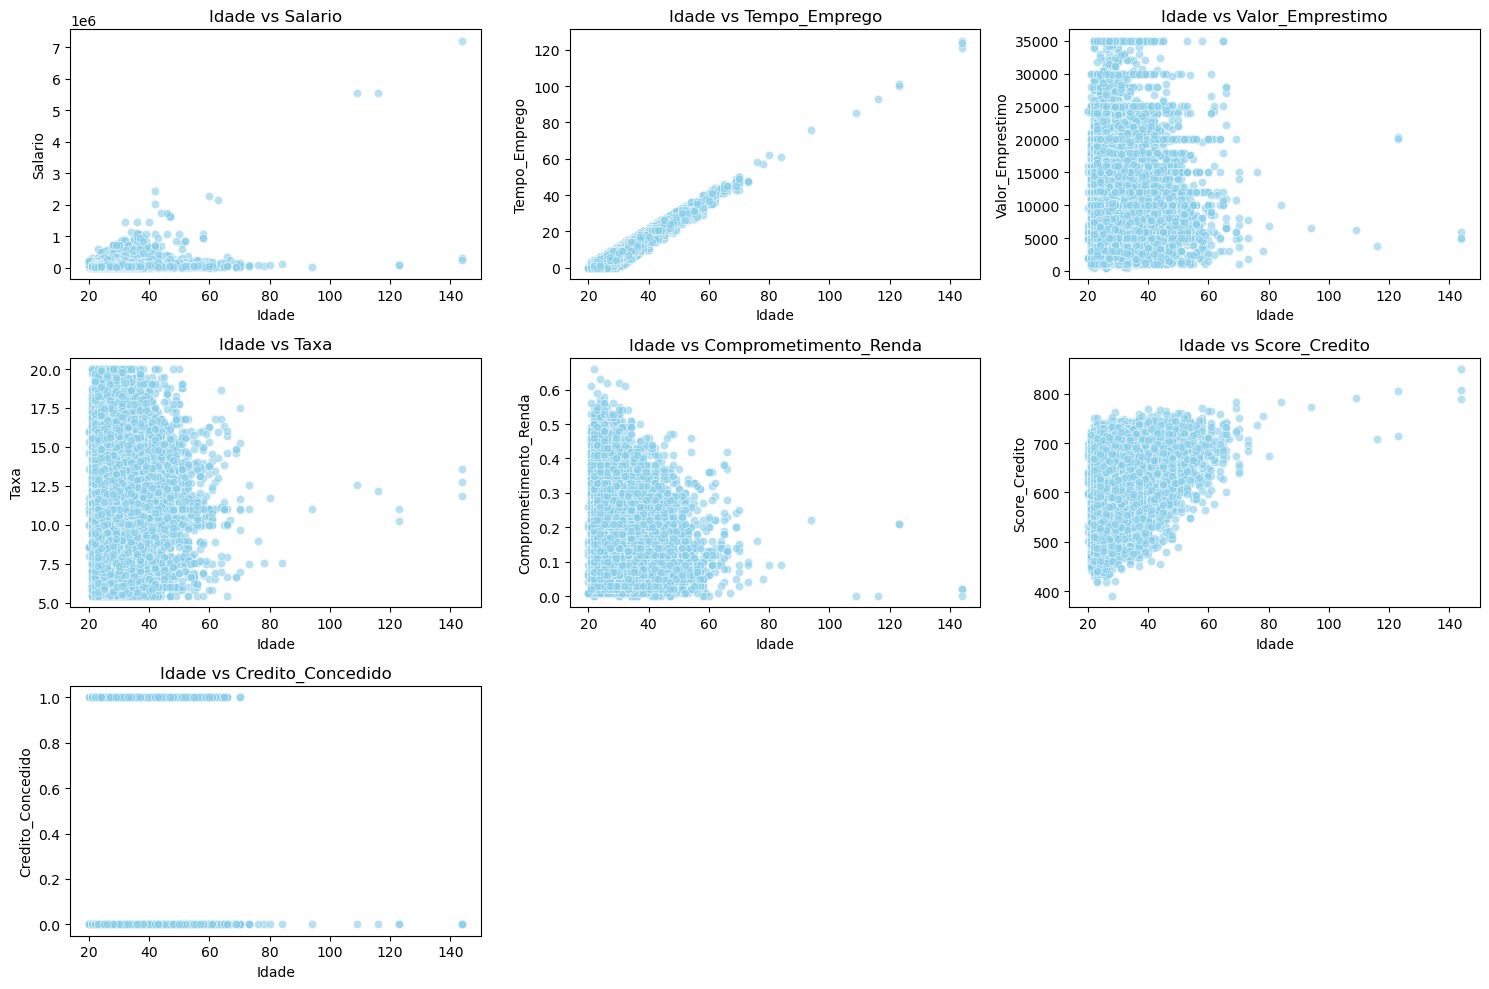

In [9]:
num_vars = data.select_dtypes(include=[np.number]).columns  # seleciona apenas variáveis numéricas
num_pairs = len(num_vars)

if num_pairs > 1:
    plt.figure(figsize=(15, 5 * (num_pairs // 3)))
    for i, col in enumerate(num_vars[1:], 1):  # pula a primeira para usar como base
        plt.subplot((num_pairs - 1) // 3 + 1, 3, i)
        sns.scatterplot(x=data[num_vars[0]], y=data[col], alpha=0.6, color='skyblue')
        plt.title(f'{num_vars[0]} vs {col}')
        plt.xlabel(num_vars[0])
        plt.ylabel(col)

    plt.tight_layout()
    plt.show()

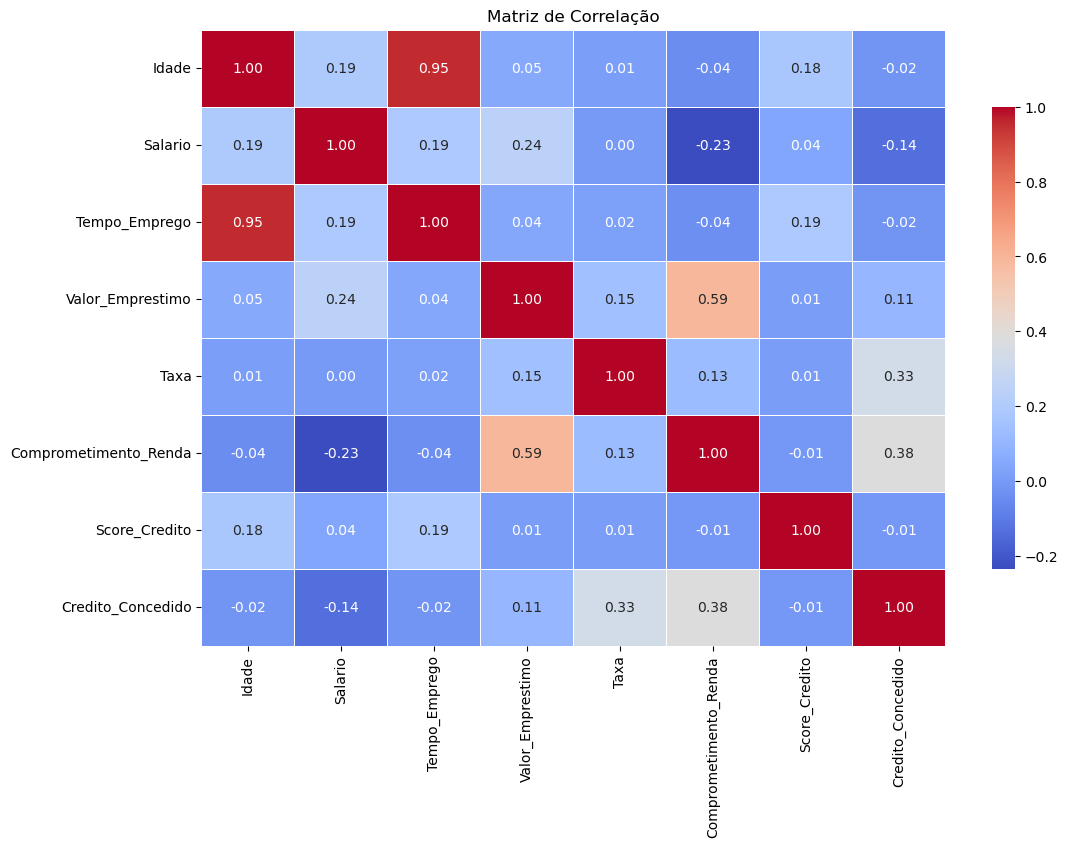

In [10]:
plt.figure(figsize=(12, 8))

corr = data.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'shrink': 0.75})
plt.title('Matriz de Correlação')
plt.show()

#### Interpretações:

1. **Desequilíbrio de Classes**:
   - **Crédito Concedido**: Se a variável "Crédito Concedido" tiver uma grande disparidade entre as classes (por exemplo, muito mais registros de "Crédito Concedido" do que "Crédito Não Concedido"), isso pode indicar um desequilíbrio de classes. Esse desequilíbrio pode afetar a performance do modelo de machine learning, fazendo com que ele se incline mais para a classe majoritária. É importante considerar técnicas de balanceamento de classes, como SMOTE ou amostragem balanceada.

2. **Outliers**:
   - **Idade**: A distribuição da variável "Idade" pode apresentar alguns outliers (valores muito distantes da média), como pessoas extremamente jovens ou mais velhas, que podem influenciar nos resultados. Identificar e tratar esses outliers é crucial, pois podem afetar a modelagem, especialmente se o modelo for sensível a valores extremos.
   - **Tempo de Emprego**: Da mesma forma, "Tempo de Emprego" pode apresentar outliers, como pessoas com muitos anos de experiência ou registros com poucos meses. A presença de outliers pode sugerir a necessidade de aplicar tratamentos para normalizar ou limitar esses valores, garantindo que eles não distorçam a análise.

3. **Relações com as Variáveis e a Idade**:
   - A **Idade** pode apresentar correlações interessantes com outras variáveis. Por exemplo, pode haver uma relação direta com a experiência profissional ("Tempo de Emprego"), já que pessoas mais velhas tendem a ter mais anos de experiência. No entanto, é importante verificar se a distribuição da idade é balanceada e se os grupos de idade possuem características bem definidas que impactam diretamente nas outras variáveis.

4. **Relações Específicas entre Variáveis**:
   - **Idade e Tempo de Emprego**: Existe uma relação alta entre a idade e o tempo de emprego. Isso é esperado, pois pessoas mais velhas tendem a ter mais anos de experiência no mercado de trabalho. Essa correlação deve ser considerada ao analisar a experiência e a qualificação dos indivíduos.
   - **Salário e Comprometimento de Renda**: A relação inversa entre "Salário" e "Comprometimento de Renda" pode sugerir que, à medida que o salário aumenta, o comprometimento com a renda (percentual da renda destinado ao pagamento de dívidas, por exemplo) tende a diminuir. Isso pode indicar que pessoas com salários mais elevados têm mais flexibilidade financeira.
   - **Salário e Crédito Concedido**: A relação entre "Salário" e "Crédito Concedido" pode ser direta, onde pessoas com salários mais altos tendem a ter maior crédito concedido, já que bancos ou instituições financeiras consideram o poder aquisitivo para autorizar empréstimos.
   - **Valor do Empréstimo e Comprometimento de Renda**: Uma relação positiva entre "Valor do Empréstimo" e "Comprometimento de Renda" pode indicar que, quanto maior o empréstimo, maior o impacto no comprometimento da renda do indivíduo. Isso é natural, pois empréstimos maiores exigem parcelas mais altas, comprometendo uma parte significativa da renda.
   - **Taxa e Crédito Concedido**: A "Taxa" (talvez taxa de juros ou alguma outra métrica) pode ter uma relação com o "Crédito Concedido", onde taxas mais baixas podem estar associadas ao aumento de crédito concedido. Isso pode ocorrer porque, com taxas de juros mais baixas, o crédito torna-se mais acessível e menos oneroso para os indivíduos.

---

## 3. Pré-processamento de Dados

**Objetivo:** Preparar os dados para o modelo de aprendizado de máquina.

1. Tratamento de outliers
2. Codificação de variáveis categóricas
3. Normalização/Escala das variáveis numéricas
4. Divisão dos dados em treino e teste

#### 1. Tratamento de Outliers

In [11]:
def tratar_outliers(data, limiar=5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    iqr = q3 - q1
    limite_inferior = q1 - limiar * iqr
    limite_superior = q3 + limiar * iqr

    data = np.where(data < limite_inferior, limite_inferior, data)
    data = np.where(data > limite_superior, limite_superior, data)

    return data

columns = ["Idade", "Tempo_Emprego"]
for col in columns:
    data[col] = tratar_outliers(data[col])

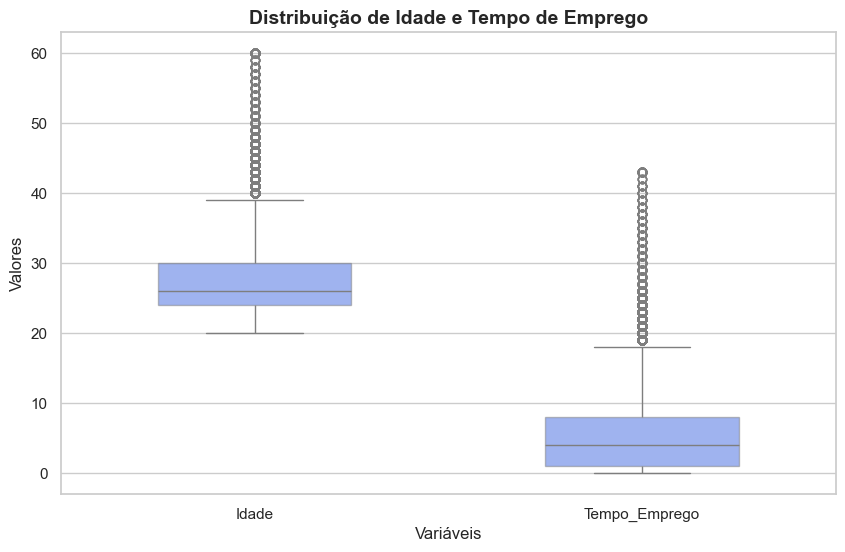

In [12]:
sns.set(style="whitegrid", palette="Blues")

plt.figure(figsize=(10, 6))

# boxplots lado a lado
sns.boxplot(data=data[["Idade", "Tempo_Emprego"]], width=0.5, boxprops=dict(facecolor="royalblue", alpha=0.5))

# títulos e labels
plt.title("Distribuição de Idade e Tempo de Emprego", fontsize=14, fontweight="bold")
plt.xlabel("Variáveis", fontsize=12)
plt.ylabel("Valores", fontsize=12)

plt.show()

#### 2. Codificação de variáveis categóricas

In [13]:
ohe = OneHotEncoder(sparse_output=False, drop="first") # evita multicolinearidade

variaveis_categoricas_ohe = ["Sexo", "Moradia", "Proposito"]
encoded_data = ohe.fit_transform(data[variaveis_categoricas_ohe])

df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(variaveis_categoricas_ohe), index=data.index)

data = data.drop(columns=variaveis_categoricas_ohe).join(df)

In [14]:
lb = LabelBinarizer()

data["Inadimplencias_Anteriores"] = lb.fit_transform(data["Inadimplencias_Anteriores"])

In [15]:
label_encoder = LabelEncoder()
data["Grau_Escolaridade"] = label_encoder.fit_transform(data["Grau_Escolaridade"])

In [16]:
data.head()

,Idade,Grau_Escolaridade,Salario,Tempo_Emprego,Valor_Emprestimo,Taxa,Comprometimento_Renda,Score_Credito,Inadimplencias_Anteriores,Credito_Concedido,Sexo_masculino,Moradia_HIPOTECA,Moradia_OUTROS,Moradia_PRÓPRIA,Proposito_MÉDICO,Proposito_PESSOAL,Proposito_PROJETO,Proposito_QUITAÇÃO,Proposito_REFORMA
0,22.0,2,71948.0,0.0,35000.0,16.02,0.49,561,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,21.0,3,12282.0,0.0,1000.0,11.14,0.08,504,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,25.0,3,12438.0,3.0,5500.0,12.87,0.44,635,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,23.0,0,79753.0,0.0,35000.0,15.23,0.44,675,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24.0,2,66135.0,1.0,35000.0,14.27,0.53,586,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### 3. Normalização/Escala das variáveis numéricas



In [17]:
data['Salario'] = np.log1p(data['Salario'].clip(lower=1))

In [18]:
scaler_cols = ['Idade', 'Salario', 'Tempo_Emprego', 'Valor_Emprestimo', 'Taxa', 'Inadimplencias_Anteriores', 'Score_Credito']

robust_scaler = RobustScaler()

data[scaler_cols] = robust_scaler.fit_transform(data[scaler_cols])
data.head()

,Idade,Grau_Escolaridade,Salario,Tempo_Emprego,Valor_Emprestimo,Taxa,Comprometimento_Renda,Score_Credito,Inadimplencias_Anteriores,Credito_Concedido,Sexo_masculino,Moradia_HIPOTECA,Moradia_OUTROS,Moradia_PRÓPRIA,Proposito_MÉDICO,Proposito_PESSOAL,Proposito_PROJETO,Proposito_QUITAÇÃO,Proposito_REFORMA
0,-0.666667,2,0.099672,-0.571429,3.730699,1.138636,0.49,-1.144928,-1.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.833333,3,-2.398334,-0.571429,-0.967218,0.029545,0.08,-1.971014,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.166667,3,-2.380500,-0.142857,-0.345435,0.422727,0.44,-0.072464,-1.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.500000,0,0.245207,-0.571429,3.730699,0.959091,0.44,0.507246,-1.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.333333,2,-0.019374,-0.428571,3.730699,0.740909,0.53,-0.782609,-1.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### 4. Divisão dos dados em treino e teste

In [19]:
X = data.drop(columns=["Credito_Concedido"]) 
y = data["Credito_Concedido"] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

print("Distribuição em y_train:")
print(np.round(y_train.value_counts(normalize=True), 3))

print("\nDistribuição em y_test:")
print(np.round(y_test.value_counts(normalize=True), 3))

Distribuição em y_train:
Credito_Concedido
0    0.778
1    0.222
Name: proportion, dtype: float64

Distribuição em y_test:
Credito_Concedido
0    0.778
1    0.222
Name: proportion, dtype: float64


In [ ]:
# balancear apenas o treino 
train_data = X_train.copy()
train_data['Credito_Concedido'] = y_train

concedido = train_data[train_data['Credito_Concedido'] == 1]
nao_concedido = train_data[train_data['Credito_Concedido'] == 0]

# undersampling da classe majoritária
nao_concedido_downsampled = resample(
    nao_concedido,
    replace=False,             # sem reposição
    n_samples=len(concedido),  # mesmo número da minoria
    random_state=42
)

# combina os dois
balanced_data = pd.concat([concedido, nao_concedido_downsampled])

# embaralha
balanced_data = balanced_data.sample(frac=1, random_state=42)

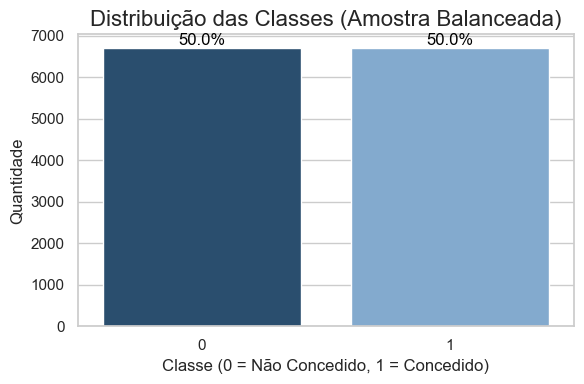

In [21]:
sns.set(style='whitegrid')

plt.figure(figsize=(6, 4))
ax = sns.countplot(
    x='Credito_Concedido',
    data=balanced_data,
    palette={'0': '#1f4e79', '1': '#76aadb'}
)

# rótulos de contagem ou porcentagem
total = len(balanced_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.title('Distribuição das Classes (Amostra Balanceada)', fontsize=16)
plt.xlabel('Classe (0 = Não Concedido, 1 = Concedido)', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.tight_layout()
plt.show()

-----
## 4. Engenharia de Atributos (Feature Engineering)

- Criação de novas features a partir das existentes 
- Seleção das features mais relevantes 
- Transformação de features (log, raiz quadrada, etc.) 
- Análise da importância das features 

In [22]:
balanced_data.head()

,Idade,Grau_Escolaridade,Salario,Tempo_Emprego,Valor_Emprestimo,Taxa,Comprometimento_Renda,Score_Credito,Inadimplencias_Anteriores,Sexo_masculino,Moradia_HIPOTECA,Moradia_OUTROS,Moradia_PRÓPRIA,Proposito_MÉDICO,Proposito_PESSOAL,Proposito_PROJETO,Proposito_QUITAÇÃO,Proposito_REFORMA,Credito_Concedido
37797,0.166667,2,0.884443,-0.285714,1.445715,-0.002273,0.15,-0.579710,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
15208,-0.333333,0,1.146050,-0.142857,0.276348,-0.004545,0.07,0.637681,-1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
15889,0.000000,0,-2.088888,0.000000,-0.759957,-0.231818,0.16,0.318841,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
38795,0.000000,4,-0.581315,-0.142857,1.383537,-0.154545,0.41,-1.333333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
17951,0.833333,0,1.112987,1.000000,2.431863,1.125000,0.17,0.391304,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


#### 1. Criação de Novas Features

In [23]:
balanced_data['Proporcao_Emprestimo_Renda'] = balanced_data['Valor_Emprestimo'] / (balanced_data['Salario'] + 1)

X_test = X_test.copy()
X_test['Proporcao_Emprestimo_Renda'] = X_test['Valor_Emprestimo'] / (X_test['Salario'] + 1)

#### 2. Seleção de Features Relevantes

Credito_Concedido             1.000000
Comprometimento_Renda         0.405494
Taxa                          0.383712
Valor_Emprestimo              0.124313
Proposito_QUITAÇÃO            0.104656
Proposito_MÉDICO              0.088356
Proporcao_Emprestimo_Renda    0.036720
Proposito_REFORMA             0.032230
Moradia_OUTROS                0.024031
Sexo_masculino               -0.002247
Score_Credito                -0.006150
Grau_Escolaridade            -0.007981
Tempo_Emprego                -0.014972
Proposito_PESSOAL            -0.017280
Idade                        -0.019463
Moradia_PRÓPRIA              -0.127596
Proposito_PROJETO            -0.128828
Moradia_HIPOTECA             -0.268187
Salario                      -0.327317
Inadimplencias_Anteriores    -0.695542
Name: Credito_Concedido, dtype: float64


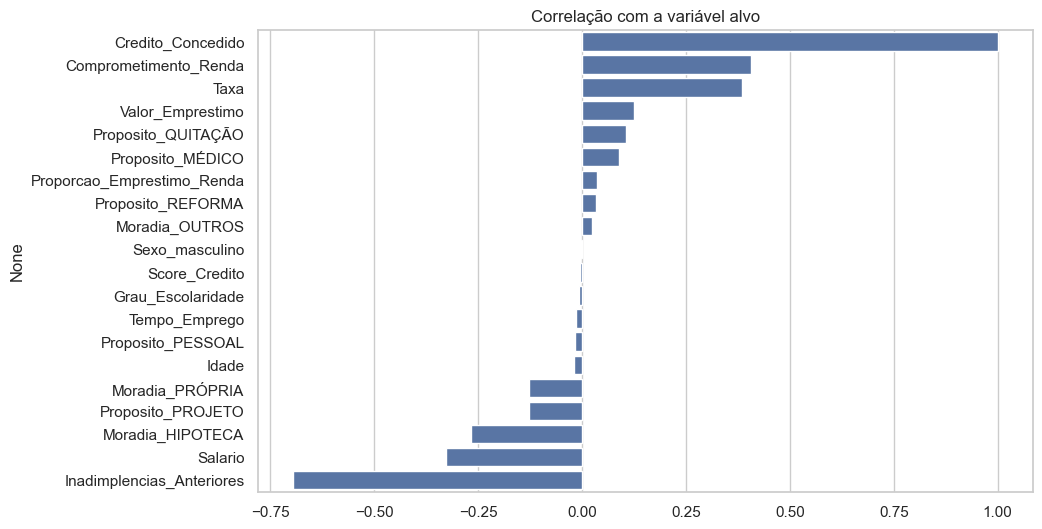

In [24]:
correlation = balanced_data.corr(numeric_only=True)['Credito_Concedido'].sort_values(ascending=False)
print(correlation)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.values, y=correlation.index)
plt.title('Correlação com a variável alvo')
plt.show()

##### Features Relevantes:
- Comprometimento_Renda    
- Taxa  
- Valor_Emprestimo
- Moradia_PRÓPRIA       
- Moradia_HIPOTECA         
- Salario            
- Inadimplencias_Anteriores   

#### 3. Transformação de Features

Verificação se existe assimetrias

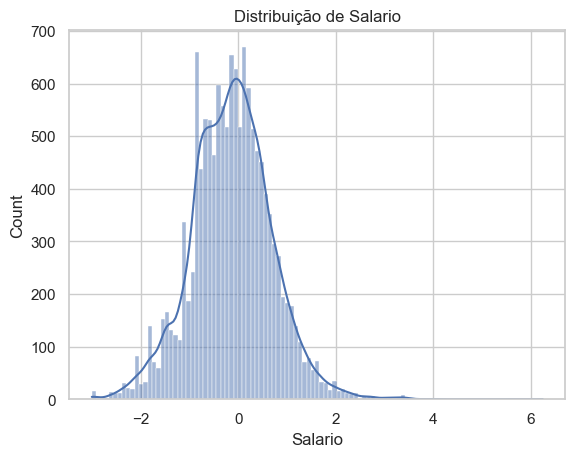

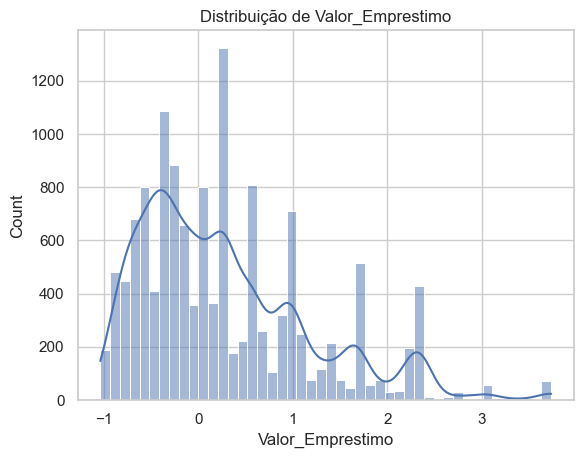

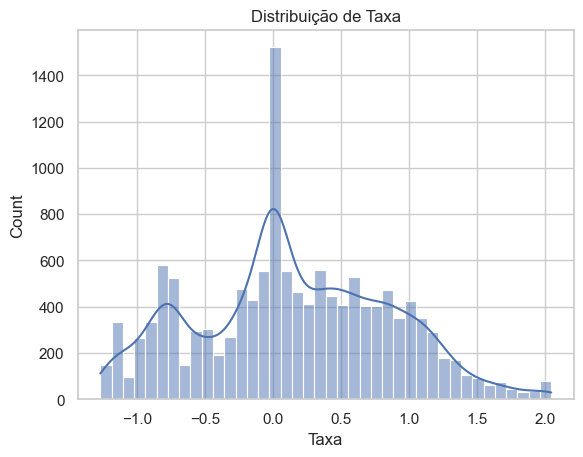

In [25]:
for col in ['Salario', 'Valor_Emprestimo', 'Taxa']:
    sns.histplot(balanced_data[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.show()

-----
## 5. Treinamento do Modelo de Classificação
**Objetivo:** Treinar um modelo de machine learning para prever a concessão de crédito.
- Escolha do algoritmo de classificação 
- Treinamento do modelo 
- Avaliação do modelo (acurácia, precisão, recall) 
- Ajuste de hiperparâmetros
- Validação cruzada 

In [29]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

scoring_metrics = {
    'Accuracy': 'accuracy',
    'Precision': 'precision',
    'Recall': 'recall',
    'F1 Score': 'f1'
}

results = {}

for name, model in models.items():
    print(f"\nAvaliando {name}")
    model_results = {}
    for metric_name, scoring in scoring_metrics.items():
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scoring)
        mean_score = np.mean(scores)
        model_results[metric_name] = mean_score
        print(f"{metric_name}: {mean_score:.4f}")
    results[name] = model_results

results_df = pd.DataFrame(results).T
print("\nResumo dos Resultados:")
display(results_df)


Avaliando Logistic Regression
Accuracy: 0.8974
Precision: 0.7746
Recall: 0.7594
F1 Score: 0.7669

Avaliando Random Forest
Accuracy: 0.9289
Precision: 0.8994
Recall: 0.7657
F1 Score: 0.8271

Avaliando XGBoost
Accuracy: 0.9309
Precision: 0.8789
Recall: 0.7994
F1 Score: 0.8372

Avaliando LightGBM
[LightGBM] [Info] Number of positive: 5360, number of negative: 18760
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002598 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1157
[LightGBM] [Info] Number of data points in the train set: 24120, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222222 -> initscore=-1.252763
[LightGBM] [Info] Start training from score -1.252763
[LightGBM] [Info] Number of positive: 5360, number of negative: 18760
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002128 seconds.
You can set `force_col_wise=true` to 

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.897380,0.774582,0.759403,0.766878
Random Forest,0.928889,0.899378,0.765672,0.827081
XGBoost,0.930945,0.878850,0.799403,0.837218
LightGBM,0.931642,0.889468,0.790597,0.837101


#### Melhoria de Hiperparâmetros

In [36]:
lgbm = LGBMClassifier(random_state=42)

# espaço de busca
param_dist = {
    'n_estimators': sp_randint(100, 1000),
    'learning_rate': uniform(0.01, 0.3),
    'num_leaves': sp_randint(20, 150),
    'max_depth': sp_randint(3, 15),
    'min_child_samples': sp_randint(5, 50),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

# random search com validação cruzada estratificada
search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

print("Melhores parâmetros:", search.best_params_)
print("Melhor F1 Score (validação cruzada):", search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 6700, number of negative: 23450
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1158
[LightGBM] [Info] Number of data points in the train set: 30150, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222222 -> initscore=-1.252763
[LightGBM] [Info] Start training from score -1.252763
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [37]:
# treinando o modelo com os melhores parâmetros
model = LGBMClassifier(
    colsample_bytree=np.float64(0.5045985258083148),
    learning_rate=np.float64(0.04044146285980963),
    max_depth=5,
    min_child_samples=29,
    n_estimators=960,
    num_leaves=147,
    subsample=np.float64(0.6526819301721967),
    random_state=42
)

model.fit(X_train, y_train)

# previsões
X_test_aligned = X_test[X_train.columns]
y_pred = model.predict(X_test_aligned)
y_prob = model.predict_proba(X_test_aligned)[:, 1]
metrics_results = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, zero_division=0),
    'Recall': recall_score(y_test, y_pred, zero_division=0),
    'F1 Score': f1_score(y_test, y_pred, zero_division=0)
}

for metric, value in metrics_results.items():
    print(f"{metric}: {value:.4f}")

[LightGBM] [Info] Number of positive: 6700, number of negative: 23450
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1158
[LightGBM] [Info] Number of data points in the train set: 30150, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222222 -> initscore=-1.252763
[LightGBM] [Info] Start training from score -1.252763
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

-----
## 6. Interpretação e Comunicação dos Resultados
**Objetivo:** Interpretar os resultados do modelo e comunicar conclusões de forma clara.
- Interpretação dos resultados do modelo
- Visualização dos resultados (matriz de confusão, curva ROC) 


AUC Score: 0.9781


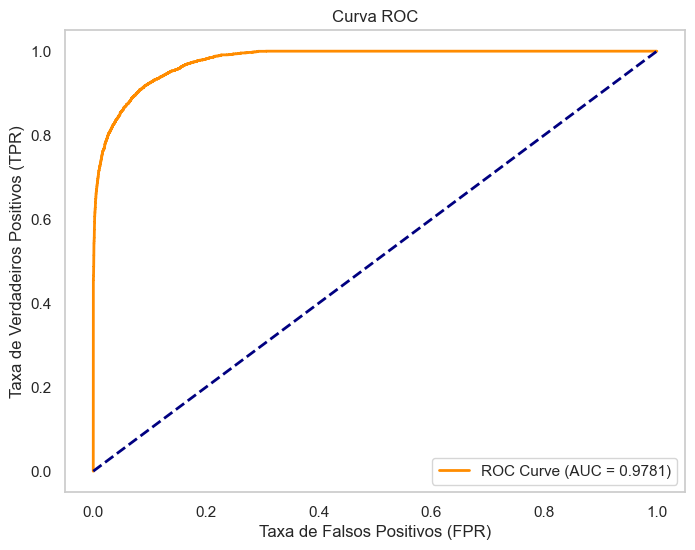

In [40]:
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.4f}")

# curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# visualização da Curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()